In [8]:
FILE_URL <- "http://tarwi.lamolina.edu.pe/~clopez/Regresion/Grasa.txt"
FILE_ENCONDING <- "ISO-8859-1"
SEPARATOR <- "\t"

# Read file
Grasa.data <- read.csv(FILE_URL, fileEncoding = FILE_ENCONDING, sep = SEPARATOR)

# Mostrar datos
head(Grasa.data)

Grasa,Edad,Peso,Altura,Cuello,Pecho,Abdomen,Cadera,Muslo,Rodilla,Tobillo,Biceps,Antebrazo,Muñeca
12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [9]:
library(car)

In [11]:
# Creamos nuestro primer modelo
Grasa.m1 <- lm(Grasa ~ ., data = Grasa.data)

# Calculo de los factores de inflacion de varianza
vif(Grasa.m1)

# se recomienda no considerar las variables predictores que tienen un valor > 10

Edad      Peso    Altura    Cuello     Pecho   Abdomen    Cadera     Muslo 
 2.250450 33.509320  1.674591  4.324463  9.460877 11.767073 14.796520  7.777865 
  Rodilla   Tobillo    Biceps Antebrazo    Muñeca 
 4.612147  1.907961  3.619744  2.192492  3.377515

In [12]:
# Creamos nuestro segundo modelo
Grasa.m2 <- lm(Grasa ~ . - Peso, data = Grasa.data)

# Calculo de los factores de inflacion de varianza
vif(Grasa.m2)

Edad    Altura    Cuello     Pecho   Abdomen    Cadera     Muslo   Rodilla 
 2.153693  1.329805  3.955600  7.883188 11.285465 10.469282  7.753101  4.312352 
  Tobillo    Biceps Antebrazo    Muñeca 
 1.843789  3.506897  2.192230  3.308705

In [13]:
# Creamos nuestro tercer modelo
Grasa.m3 <- lm(Grasa ~ . - Peso - Abdomen, data = Grasa.data)

# Calculo de los factores de inflacion de varianza
vif(Grasa.m3)

Edad    Altura    Cuello     Pecho    Cadera     Muslo   Rodilla   Tobillo 
 1.761778  1.329243  3.922800  4.882583  8.508681  7.574672  4.310949  1.837676 
   Biceps Antebrazo    Muñeca 
 3.481013  2.186342  3.258218

In [14]:
####################################
#         Best Selection 
####################################
install.packages("leaps")
library(leaps)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
# Calculo del numero de columna de Grasa.data 
# El valor que sale se le quita 1, porque incluye la salida
dim(Grasa.data)
# En total hay 14-1 = 13 columnas

[1] 252  14

In [15]:
# nvmax --> indica el numero de variables predictoras que estoy usando
Grasa.bss <- regsubsets(Grasa ~ ., data = Grasa.data, nvmax = 13)

summary(Grasa.bss)

Subset selection object
Call: regsubsets.formula(Grasa ~ ., data = Grasa.data, nvmax = 13)
13 Variables  (and intercept)
          Forced in Forced out
Edad          FALSE      FALSE
Peso          FALSE      FALSE
Altura        FALSE      FALSE
Cuello        FALSE      FALSE
Pecho         FALSE      FALSE
Abdomen       FALSE      FALSE
Cadera        FALSE      FALSE
Muslo         FALSE      FALSE
Rodilla       FALSE      FALSE
Tobillo       FALSE      FALSE
Biceps        FALSE      FALSE
Antebrazo     FALSE      FALSE
Muñeca        FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          Edad Peso Altura Cuello Pecho Abdomen Cadera Muslo Rodilla Tobillo
1  ( 1 )  " "  " "  " "    " "    " "   "*"     " "    " "   " "     " "    
2  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " "    
3  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " "    
4  ( 1 )  " "  "*"  " "    " "    " "   "*"     " "    " "   " "     " " 

In [ ]:
#           Edad Peso Altura Cuello Pecho Abdomen Cadera Muslo Rodilla Tobillo
# 1  ( 1 )  " "  " "  " "    " "    " "   "*"     " "    " "   " "     " "    

# En esta salida el mejor modelo 1 es el que incluye solo la variable predictora Abdomen

# En Resumen :
#
# Ejemplo: Grasa.bss
#   M1: Grasa ~ Abdomen
#   M2: Grasa ~ Peso + Abdomen
#   M3: Grasa ~ Peso + Abdomen + Muñeca
#
#
#   M13: Grasa ~ .

In [17]:
reg.summary <- summary(Grasa.bss)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [ ]:
# rsq   --> Coeficiente de determinacion
# rss   --> Suma de cuadrados del residual
# adjr2 --> R cuadrado ajustado
# cp    -->
# bic   -->

In [18]:
# Coeficiente de determinacion
reg.summary$rsq

[1] 0.6616721 0.7187981 0.7277401 0.7350112 0.7379161 0.7409681 0.7444763
 [8] 0.7465540 0.7477322 0.7484878 0.7489813 0.7490458 0.7490500

In [ ]:
# Ejemplo: Grasa.bss
#                                2
#   M1: Grasa ~ Abdomen   --->  R    = 66.2%
#                                H1 
#                                       2
#   M2: Grasa ~ Peso + Abdomen  --->   R   = 71.9%
#                                       H2 
#
#   M3: Grasa ~ Peso + Abdomen + Muñeca
#
#
#   M13: Grasa ~ .  --->
#
#

In [19]:
# Suma de cuadrado
reg.summary$rss

[1] 5947.463 4943.245 4786.054 4658.236 4607.169 4553.520 4491.849 4455.324
 [9] 4434.613 4421.330 4412.655 4411.522 4411.448

In [ ]:
# Se observa que el coeficiente de determinacion y la suma de cuadrado no es útil 
# para elegir el mejor modelo

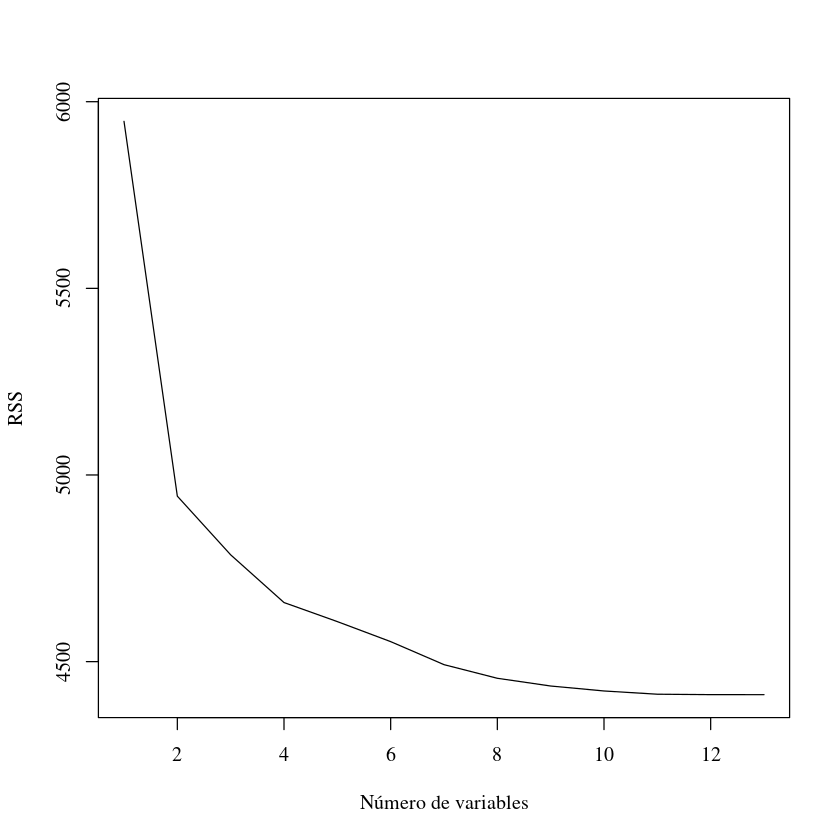

In [20]:
plot(reg.summary$rss, xlab = "Número de variables", ylab = "RSS", type = "l")

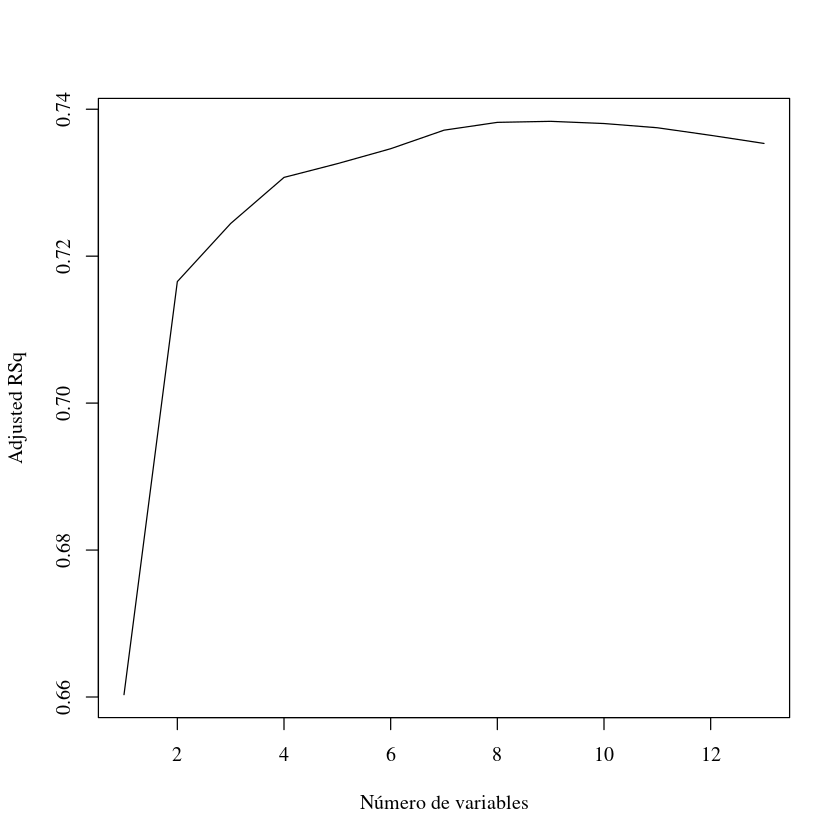

In [21]:
# R cuadrado ajustado , el mejor modelo es el que tiene el mayor valor

plot(reg.summary$adjr2, xlab = "Número de variables", ylab = "Adjusted RSq", type = "l")